# Task 3 - Eigenfaces

**I did everything using** [this page](https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184).

I have forgotten details of PCA. Need to review a little bit.

Images are from [Labeled Faces in the Wild collection](http://vis-www.cs.umass.edu/lfw/)

In [1]:
# import warnings
# warnings.filterwarnings("ignore")

import csv
import numpy as np
import pandas as pd
# import geopandas as gpd
from IPython.display import Image
# from shapely.geometry import Point, Polygon
from math import factorial
import scipy
import scipy.signal
import os, os.path

from datetime import date
import datetime
import time

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from patsy import cr

# from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sb

import sys
import io

# to move files from one directory to another
import shutil


import yfinance as yf
from nasdaq_stock import nasdaq_stock as nasdaq_stock
import requests


from pylab import rcParams



# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
sys.path.append('../')
import cycles_core as cc
import cycles_plot_core as cpc

In [2]:
images_directory = "/Users/hn/Documents/01_research_data/cycles/lfwcrop_grey/faces/"
images_directory = "/Users/hn/Documents/01_research_data/cycles/lfw_funneled/"
plot_dir = "/Users/hn/Documents/cyclesFigs/"

In [3]:
celebrity_photos = os.listdir(images_directory)[1:1001]
# celebrity_photos = os.listdir(images_directory)[11000:12000]

# It seems the following line is not necessary
celebrity_images = [images_directory + '/' + photo for photo in celebrity_photos]

images = np.array([plt.imread(image) for image in celebrity_images], dtype=np.float64)

celebrity_names = [name[:name.find('0')-1].replace("_", " ") for name in celebrity_photos]

In [4]:
n_samples, h, w = images.shape
celebrity_photos = cpc.plot_portraits(images, celebrity_names, h, w, n_row=4, n_col=4)


file_name = plot_dir + "EigFace_oroginal_photos.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False)

ValueError: too many values to unpack (expected 3)

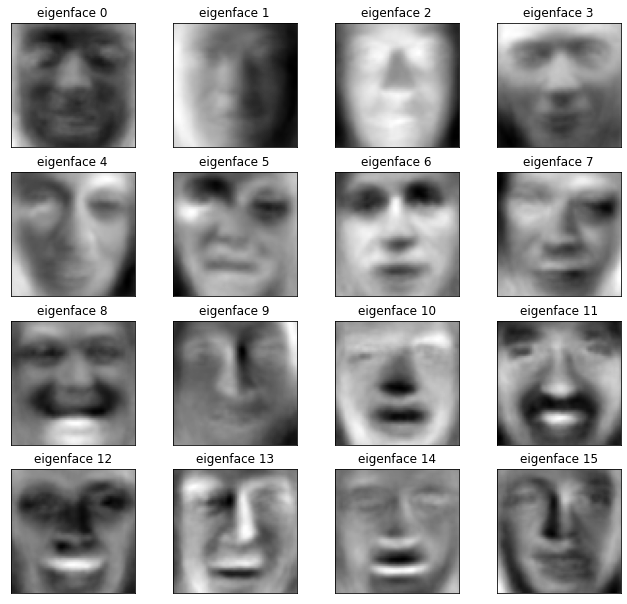

In [29]:
n_components = 100
_, h, w = images.shape

projected, components, mean, centered_data = cc.pca(array_of_images = images, n_pc = n_components)

eigenfaces = components.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
projected_photos = cpc.plot_portraits(eigenfaces, eigenface_titles, h, w, 4, 4)

file_name = plot_dir + "EigFace_projected_basis_100Components.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False)

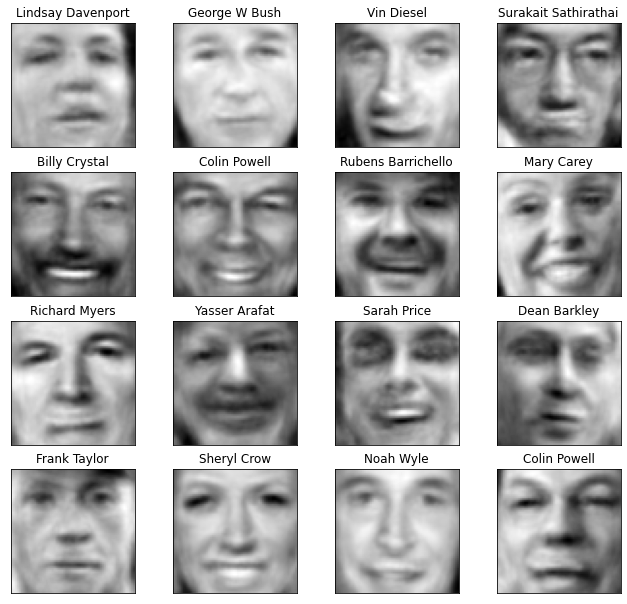

In [30]:
recovered_images = [cc.reconstruction(centered_data, components, mean, h, w, i) for i in range(len(images))]
recovered_images_fig = cpc.plot_portraits(recovered_images, celebrity_names, h, w, n_row=4, n_col=4)

file_name = plot_dir + "EigFace_recovered_photos_100Components.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False)